### All of Statistics - Chapter 8 Exercise 6
Let $X_1,..., X_n \sim N(\mu, 1).$ Let $\theta = e^{\mu}$ and let $\hat\theta = e^{\bar{X}}.$ Create a data set (using $\mu = 5$) consisting of $n=100$ observations.<br>
(a) Use the boostrap to get the $se$ and 95 percent confidence interval for $\theta.$ <br>
(b) Plot a histogram of the bootstrap replications. This is an estimate of the distribution of $\hat\theta.$ Compare this to the true sampling distribution of $\hat\theta.$

In [58]:
mu = 5
n = 100
B = 5000
x <- rnorm(n, mean = mu, sd = 1)

#### 1. Construct Estimator

In [59]:
get_retheta <- function(data) {
    x.bar <- mean(data)
    return (exp(x.bar))
}

#### 2. Bootstrap Resampling

In [60]:
retheta <- numeric(B)
for (b in 1:B) {
    re_x <- sample(x, size = n, replace =TRUE)
    retheta[b] <- get_retheta(re_x)
}

#### 3. Construct Confidence Interval

In [61]:
alpha = 0.05
theta <- get_retheta(x)
est_se <- sqrt(var(retheta))
q_low <- quantile(retheta, probs = alpha/2)
q_high <- quantile(retheta, probs = 1-(alpha/2))

In [74]:
print(paste0("The estimated s.e = ", round(est_se, 3)))

[1] "The estimated s.e = 17.171"


In [62]:
norm_ci <- c(theta-qnorm(1-(alpha/2))*est_se, theta+qnorm(1-(alpha/2))*est_se)
pivotal_ci <- c(2*theta-q_high, 2*theta-q_low)
percentile_ci <- c(q_low, q_high)

In [77]:
print(paste0("Normal Interval = (", round(norm_ci[1], 3), ", ", round(norm_ci[2], 3), ")"))
print(paste0("Pivotal Interval = (", round(pivotal_ci[1], 3), ", ", round(pivotal_ci[2], 3), ")"))
print(paste0("Quantile Interval = (", round(percentile_ci[1], 3), ", ", round(percentile_ci[2], 3), ")"))

[1] "Normal Interval = (109.213, 176.521)"
[1] "Pivotal Interval = (106.015, 173.124)"
[1] "Quantile Interval = (112.61, 179.719)"


#### 4. True Sampling Distribution of Theta

In [78]:
true_theta <- numeric(10000)
for (b in 1:10000) {
    data <- rnorm(n, mean = mu, sd = 1)
    true_theta[b] <- get_retheta(data)
}

#### 5. Comparison

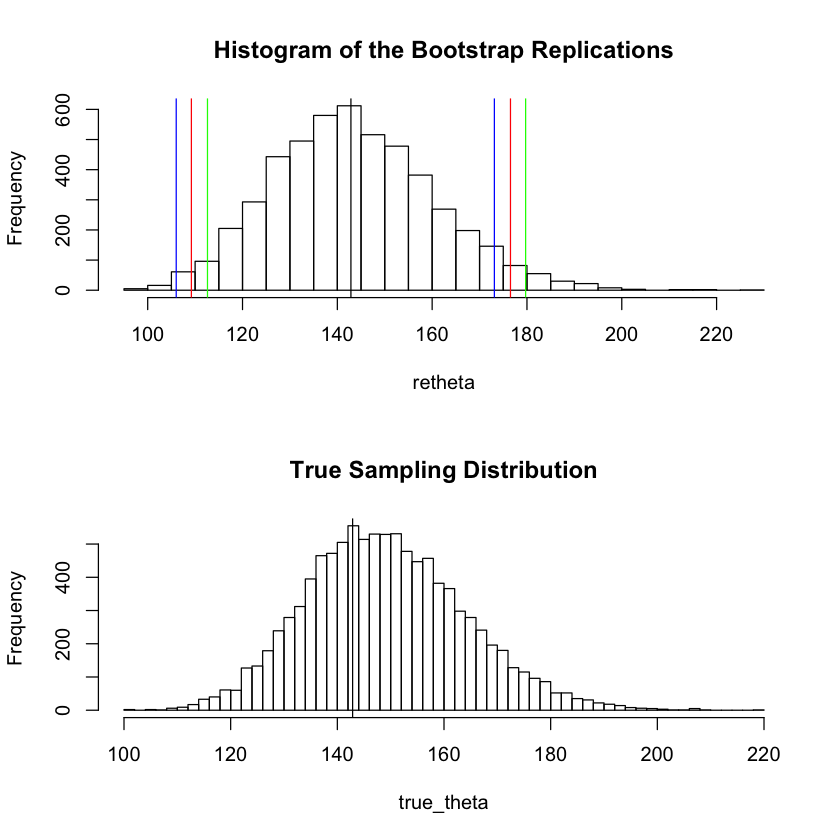

In [79]:
par(mfrow=c(2,1))    # set the plotting area into a 1*2 array
hist(retheta, breaks = 40, main = "Histogram of the Bootstrap Replications")
abline(v = norm_ci, col = "red")
abline(v = pivotal_ci, col = "blue")
abline(v = percentile_ci, col = "green")
abline(v = theta, col = "black")
hist(true_theta, breaks = 50, main = "True Sampling Distribution")
abline(v = theta, col = "black")